<a href="https://colab.research.google.com/github/divy-arpit/car-resale-predictor/blob/main/car_resale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Import data and visualize it

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/indian_car_resale/cardekho_imputated.csv",index_col=0)
# we found that car_name and model are same so lets remove car_name 
df.drop(['car_name'],axis=1,inplace=True)
df.head()

,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
#lets check the type of cols
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15411 non-null  object 
 1   model              15411 non-null  object 
 2   min_cost_price     15411 non-null  float64
 3   max_cost_price     15411 non-null  float64
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 1.8+ MB


In [ ]:
# lets have a set of numerical and catogrical data
num_cols=['min_cost_price','max_cost_price','vehicle_age','km_driven','milage','engine','max_power','seats','selling_price']
cat_cols=['brand','model','seller_type','fuel_type','transmission_type']

In [ ]:
# check size of set of catogrical data
lens=[]
for i in cat_cols:
  uni=df[i].unique()
  lens.append(uni.shape)
print(lens)
print(cat_cols)

[(32,), (120,), (3,), (5,), (2,)]
['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [ ]:
# check for na
df.isna().sum()
# no nas found

brand                0
model                0
min_cost_price       0
max_cost_price       0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

Visualize data col-wise

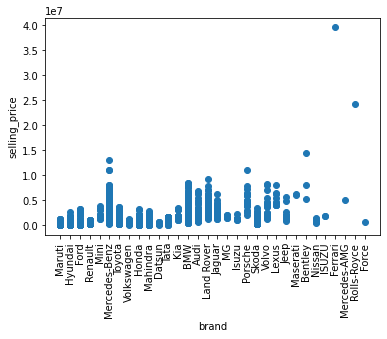

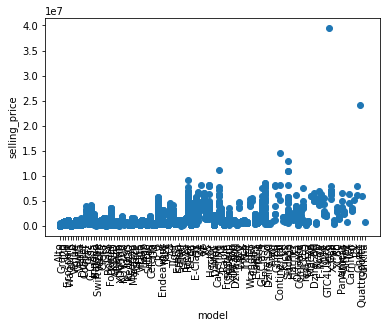

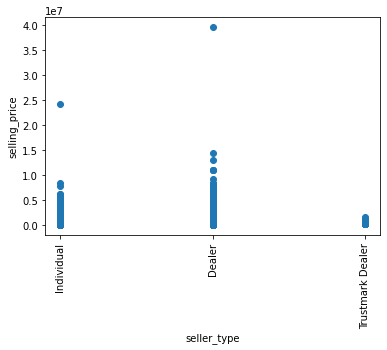

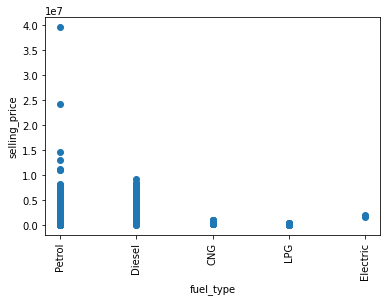

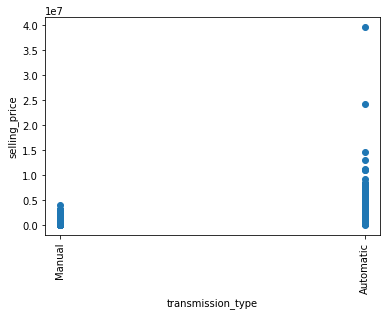

In [ ]:
for i in cat_cols:
  plt.scatter(df[i],df.selling_price)
  plt.xlabel(i)
  plt.ylabel("selling_price")
  plt.xticks(rotation = 90)
  plt.show()

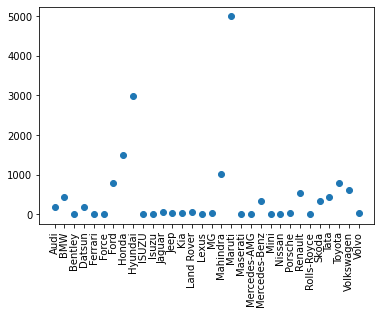

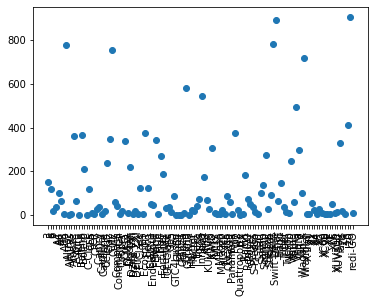

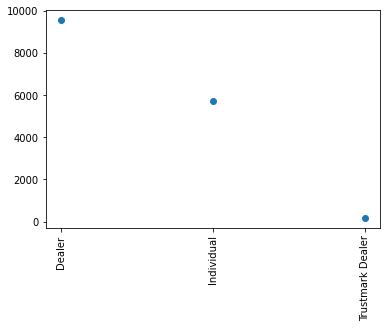

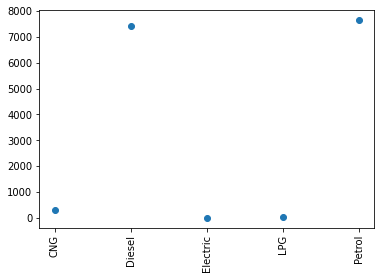

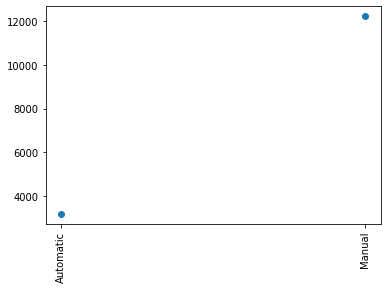

In [ ]:
#check for various values in the cat_cols
for i in cat_cols:
  co=df.pivot_table(index=[i],aggfunc ='size')
  plt.scatter(co.index,co)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
#lets encode the cat_cols
encoder_list=[]
for i in cat_cols:
  encoded=LabelEncoder().fit(df[i])
  encoder_list.append(encoded)
  df[i]=encoded.transform(df[i])
#we have saved the encoders in a list in order in which cat_cols have been saved

In [ ]:
print(encoder_list)
print(cat_cols)

[LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()]
['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [ ]:
#to do - scaling

In [ ]:
df

,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,18,7,3.570039e+05,4.654015e+05,9,120000,1,4,1,19.70,796,46.30,5,120000
1,8,54,7.110000e+05,7.480000e+05,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,8,118,8.540829e+05,1.307926e+06,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,18,7,3.570039e+05,4.654015e+05,9,37000,1,4,1,20.92,998,67.10,5,226000
4,6,38,1.014000e+06,1.379000e+06,6,30000,0,1,1,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,8,117,6.983200e+05,7.293333e+05,9,10723,0,4,1,19.81,1086,68.05,5,250000
19540,18,42,9.267760e+05,1.149968e+06,2,18000,0,4,1,17.50,1373,91.10,7,925000
19541,27,77,8.926327e+05,1.563551e+06,6,67000,0,1,1,21.14,1498,103.52,5,425000
19542,17,114,1.783000e+06,2.491000e+06,5,3800000,0,1,1,16.00,2179,140.00,7,1225000


#training and testing

linearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y)
model=LinearRegression().fit(x_train,y_train)
model.score(x_test,y_test)

0.7329194722180467

decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y)
model=DecisionTreeRegressor().fit(x_train,y_train)
model.score(x_test,y_test)

0.905393260835016